In [17]:
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
filepath = './data/week1.csv'

### Find how many plays for a team per week and extrapolate to the entire season

In [5]:
df = pd.read_csv(filepath)

In [23]:
len(df[df['gameId'] == 2018090600]['playId'].value_counts())

89

(array([5.236e+03, 2.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        3.000e+00, 0.000e+00, 0.000e+00, 2.700e+01]),
 array([  1. ,  15.9,  30.8,  45.7,  60.6,  75.5,  90.4, 105.3, 120.2,
        135.1, 150. ]),
 <BarContainer object of 10 artists>)

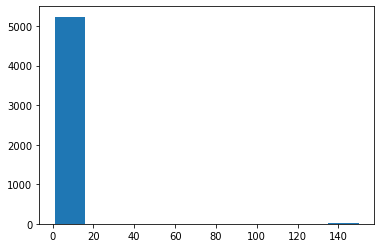

In [24]:
plt.hist(df[df['gameId'] == 2018090600]['time'].value_counts())

In [21]:
df.columns

Index(['time', 'x', 'y', 's', 'a', 'dis', 'o', 'dir', 'event', 'nflId',
       'displayName', 'jerseyNumber', 'position', 'frameId', 'team', 'gameId',
       'playId', 'playDirection', 'route'],
      dtype='object')